In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import seaborn as sns
import sklearn.metrics as metrics

In [2]:
mnist = tf.keras.datasets.mnist
 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
""" resizing images into r x r """

r = 10

sz = x_train.shape[0]
s  = x_test.shape[0]

X_train = np.zeros((sz, r, r))
X_test  = np.zeros((s , r, r))

for i in range(sz):
  X_train[i,:,:] = cv.resize(x_train[i,:,:], (r,r))
 
for i in range(s):
  X_test[i,:,:] = cv.resize(x_test[i,:,:], (r,r))

X_train = np.reshape(X_train, (60000, r, r, 1))
X_test  = np.reshape(X_test,  (10000, r, r, 1))

print(X_train.shape, X_test.shape)

(60000, 10, 10, 1) (10000, 10, 10, 1)


In [4]:
""" Creating the layers in model """

model = tf.keras.models.Sequential([
    
  tf.keras.layers.Flatten(input_shape=(10, 10)),
  tf.keras.layers.Dense(40, activation='relu',use_bias=False),
  tf.keras.layers.Dense(20, activation='relu',use_bias=False),
  tf.keras.layers.Dense(10, use_bias=False),
    
])

In [5]:
""" Specifying the Loss function """

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [6]:
""" Specifying the Optimization Algorithm and 
     metrics to use for evaluation while training """

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [7]:
""" Traning the model """

model.fit(X_train, y_train, epochs=20, batch_size=8, use_multiprocessing=True)

Epoch 1/20
7500/7500 [==============================] - 6s 744us/step - loss: 3.6062 - accuracy: 0.5128
Epoch 2/20
7500/7500 [==============================] - 6s 741us/step - loss: 0.3778 - accuracy: 0.8913
Epoch 3/20
7500/7500 [==============================] - 6s 770us/step - loss: 0.2709 - accuracy: 0.9241
Epoch 4/20
7500/7500 [==============================] - 7s 893us/step - loss: 0.2217 - accuracy: 0.9368
Epoch 5/20
7500/7500 [==============================] - 6s 830us/step - loss: 0.2023 - accuracy: 0.9426
Epoch 6/20
7500/7500 [==============================] - 6s 821us/step - loss: 0.1927 - accuracy: 0.9445
Epoch 7/20
7500/7500 [==============================] - 7s 900us/step - loss: 0.1878 - accuracy: 0.9460
Epoch 8/20
7500/7500 [==============================] - 7s 941us/step - loss: 0.1705 - accuracy: 0.9510
Epoch 9/20
7500/7500 [==============================] - 7s 957us/step - loss: 0.1712 - accuracy: 0.9519
Epoch 10/20
7500/7500 [==============================] - 8s 1ms/

In [8]:
""" Evaluating the model """

model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 0s 863us/step - loss: 0.2098 - accuracy: 0.9525


[0.20984551310539246, 0.9524999856948853]

In [9]:
""" Adding the Softmax layer at the end of model """

probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [10]:
y_prob = probability_model(X_test)

y_pred = np.argmax( y_prob, axis=1)

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.99      0.98      0.98      1135
           2       0.95      0.96      0.95      1032
           3       0.93      0.96      0.94      1010
           4       0.95      0.95      0.95       982
           5       0.96      0.94      0.95       892
           6       0.95      0.96      0.96       958
           7       0.98      0.92      0.95      1028
           8       0.94      0.94      0.94       974
           9       0.94      0.94      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



Comfusion Matrix
 [[ 969    0    4    0    1    1    2    1    2    0]
 [   0 1108    6    1    1    2    7    1    8    1]
 [   7    0  987   19    1    0    3    2   12    1]
 [   0    1    9  967    0   15    1    3    7    7]
 [   2    3    7    0  928    0   14    5    1   22]
 [  11    1    0   14    2  837   13    0   11    3]
 [  11    4    1    1    3    9  921    0    8    0]
 [   6    3   23   13    8    0    2  949    6   18]
 [   8    0    6   18    5    5    6    3  911   12]
 [   5    3    0   10   26    4    0    8    5  948]]


<AxesSubplot:>

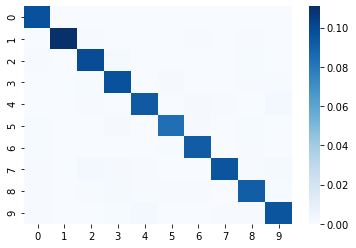

In [11]:
labels = [0,1,2,3,4,5,6,7,8,9]

cf_matrix = metrics.confusion_matrix( y_test, y_pred)

print("Comfusion Matrix\n", cf_matrix)

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=False, cmap='Blues', 
            xticklabels = labels , yticklabels = labels)

In [12]:
""" saving the model """

model.save('mnist_ESP32.h5')

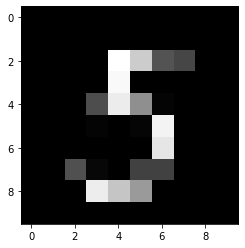

In [13]:
idx = 253

img = X_test[idx:idx+1,:]
im = np.reshape(img, (r,r))

plt.imshow(im, cmap='gray')

In [14]:
np.int32(im)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 232, 185,  76,  64,   0,   0],
       [  0,   0,   0,   0, 226,   0,   0,   0,   0,   0],
       [  0,   0,   0,  70, 214, 130,   4,   0,   0,   0],
       [  0,   0,   0,   4,   0,   5, 222,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 209,   0,   0,   0],
       [  0,   0,  73,   7,   0,  59,  59,   0,   0,   0],
       [  0,   0,   0, 215, 179, 140,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

In [15]:
print("Predicted by model :", np.argmax( probability_model(img).numpy(), axis=1)[0] )

Predicted by model : 5


In [16]:
L1 = model.weights[0].numpy()

In [17]:
L2 = model.weights[1].numpy()

In [18]:
L3 = model.weights[2].numpy()

In [19]:
""" (ESP32) For Arduino code """

print("float L1[%d][%d]="%(L1.shape[0], L1.shape[1]))
print("{")
for r in range(0,L1.shape[0]):
    print("{",end="")
    
    for c in range(0,L1.shape[1]-1):
        print(L1[r,c],end=",")
    print(L1[r,c+1],"},")

print("};")

float L1[100][40]=
{
{-0.03260249,-0.06414746,0.19837423,-0.055651784,0.06970988,0.20601447,0.11822118,0.01776819,0.035808593,-0.17961761,-0.13555819,-0.08031066,0.07552503,-0.062656626,-0.07688308,0.012911886,-0.18040112,-0.059948772,0.1432691,-0.10453721,-0.17583343,-0.055393398,-0.094376706,0.11037539,0.045298234,-0.112740055,0.16421853,-0.019632667,-0.027120963,0.16987385,-0.12057469,0.091568604,-0.081379786,-0.07742567,0.17900701,-0.1664394,0.058779344,0.06363799,0.05346985,-0.071795076 },
{0.063822106,0.21867478,-0.0047013313,0.1778975,0.048819527,0.1648248,0.0635827,-0.096083865,0.19731282,0.04616345,0.15054975,0.05324708,-0.016598478,-0.19880088,-0.0839787,0.15751095,-0.08399824,0.05790429,-0.12186282,0.14664818,-0.084649555,-0.25597158,-0.24654683,-0.14789166,0.13702556,0.07050039,-0.059252545,0.077437565,0.05277048,-0.17707646,-0.13691626,0.07488631,0.0027817339,-0.10657167,0.048687205,0.13320996,0.11049908,-0.080823705,0.037928157,0.24325499 },
{0.24896026,0.60191727,-0.4435

{-0.11997507,-0.4651328,-0.34593627,0.1736762,0.19948316,0.09059643,0.35600632,-0.4165129,0.4871122,0.16435178,0.52972215,-0.22998148,0.18073651,-0.050579198,-0.5134415,-0.3387041,0.2195023,0.110028274,0.017039068,0.14905855,0.07211561,0.11522124,-0.11877455,0.5307413,-0.21316889,-0.7958161,0.72403,0.45357117,0.036200833,-0.07687243,-0.09308198,-0.27385566,0.47865707,0.27706462,0.17069119,0.08463817,0.09924261,-0.27525732,0.14444013,0.14350244 },
{-0.46727258,-0.136409,0.06556698,0.143608,0.54315084,0.11530025,0.277207,-1.0182348,-0.13645294,0.03145436,-0.102570236,-0.30962113,-0.49420667,0.1841765,-0.8191586,-0.25430372,0.04920586,0.25811496,0.1159145,0.3838754,-0.47641164,-0.065630116,-0.43658042,0.47615182,-0.049963113,0.21858391,0.057819817,0.10708965,0.38231215,-0.34880906,-0.49919736,-0.020497447,0.2305809,0.17269056,-0.7392233,-0.8639276,-0.27933326,0.40311915,0.39945123,0.041604318 },
{-2.0382543,-0.13953103,0.13527365,-0.22721647,0.4001806,0.27335864,0.24091312,-0.05509608,-0.

{0.17687762,-0.052679952,-0.2251528,0.004996757,-0.028388115,0.094098195,-0.042361002,0.086596705,-0.709242,0.24084137,-0.7190234,0.16201077,-0.0014776462,-0.036804274,0.19488724,0.024637936,-0.078906044,-0.011943396,-0.08822355,-1.3045552,0.0354003,0.18201475,-0.253612,-0.3272955,-0.47393107,-0.12077447,-3.7979336,0.08348174,0.09479759,0.3122843,-0.35068366,0.21804798,-0.030425629,-0.10522488,0.038848434,0.4397322,0.07897326,0.08216364,-2.7600598,0.03984441 },
{-0.05218934,-0.093779884,-0.5051243,0.11620922,0.076080725,-0.43770882,-0.30094254,-0.07841562,-0.33576113,-0.003725556,-0.4158808,-0.09904433,0.11333325,-0.5227729,0.15289733,0.069112256,0.20438938,0.09497403,-0.279436,-1.1544045,-0.12448506,0.6963656,0.13287005,0.034026746,-0.6754759,-0.111129284,0.22669362,-0.019896936,-0.015512397,0.040145773,-0.03318903,-0.05017941,0.05392544,0.08372835,-0.09948195,0.07712949,0.17540859,0.24897358,-0.033708174,0.18518104 },
{-0.16014768,0.13913949,0.11001516,0.10944378,-0.050185926,0.00048

{0.031131165,-0.09382766,0.53230065,0.14547785,-0.034922324,-0.14295577,0.2031222,0.37200633,-0.030277638,-0.098612115,0.824744,-0.3263131,0.37228864,0.15812653,0.97267884,0.44399244,-0.3658442,-0.17636499,0.61737025,-0.15166566,-0.012825411,-0.2352009,0.04512628,0.07918307,-0.5356677,0.17476995,-1.0196795,0.7437036,0.57508326,0.09784744,0.008036328,0.20609823,-0.24438296,-0.26272655,0.21891977,0.34086847,-0.8378894,0.1520727,-1.2418084,0.37647033 },
{1.0144092,-0.09631214,-0.16208017,0.19300836,0.51891476,0.34586838,-0.36464125,0.13754034,-0.09076739,-0.7691149,0.59081984,0.27201298,0.41647762,-0.37810412,-0.22976242,0.65653354,0.07616008,0.38119575,0.37537432,0.16813745,0.5856921,-0.6326848,0.0053015584,-0.08929321,-0.40028724,0.3899556,-0.011771426,1.0603707,0.27183995,0.33613443,0.75472337,0.18873,0.059023283,-0.55299205,-0.004835172,0.16897443,0.19660527,-0.13997579,0.12790288,0.013929884 },
{-0.099795945,0.11328618,0.07688086,-0.16666882,0.019261748,0.016030326,0.11038639,-0.1713

In [20]:
print("float L2[%d][%d]="%(L2.shape[0], L2.shape[1]))
print("{")
for r in range(0,L2.shape[0]):
    print("{",end="")
    
    for c in range(0,L2.shape[1]-1):
        print(L2[r,c],end=",")
    print(L2[r,c+1],"},")

print("};")

float L2[40][20]=
{
{0.5006527,0.15596005,-0.1672403,0.052782357,-0.096520364,0.31014717,0.21276405,0.025218822,0.13325532,-0.36444628,0.44486594,0.35966957,0.055546556,0.06964138,0.9122869,0.015787346,0.1383998,-0.30143252,-0.065851144,-0.10188077 },
{0.37395597,0.26933497,-0.022759022,0.001475852,0.056722116,0.2381198,0.14795776,-0.17334688,-0.35345697,0.12049912,-0.17080167,-0.3755839,-0.32126415,0.0432991,0.3520575,-0.042747363,-0.11484495,-0.3416608,-0.09530745,-0.12596773 },
{0.35967308,-0.2291307,-0.57884693,0.10702728,-0.04011343,0.24757876,-0.025189294,-0.1477279,0.11933198,0.045301933,0.22134484,0.16552967,0.30977008,0.097110264,-0.21318552,0.27943856,0.32912368,0.09605492,0.17241548,-0.20681721 },
{-0.23369682,0.10637958,0.0042611277,0.0004369146,-0.014026129,-0.07305968,0.31404996,-0.06947277,-0.21630116,-0.18399706,0.14203261,0.423838,0.37730995,-0.19754826,0.38806877,-0.11207275,0.095499545,-0.31153315,-0.24718936,-0.33384255 },
{0.20678702,-0.09798091,-0.16078746,-0.1489

In [21]:
print("float L3[%d][%d]="%(L3.shape[0], L3.shape[1]))
print("{")
for r in range(0,L3.shape[0]):
    print("{",end="")
    
    for c in range(0,L3.shape[1]-1):
        print(L3[r,c],end=",")
    print(L3[r,c+1],"},")

print("};")

float L3[20][10]=
{
{-0.7059337,-0.4747883,-0.4772646,-0.7549963,-0.8756577,-0.44372153,-0.27724436,-0.59987324,-1.334821,-0.9327553 },
{0.04287861,0.11016501,0.028884804,0.015127964,0.008049444,0.11396198,0.15863766,0.05749439,0.083253816,-0.0068915244 },
{0.09272303,0.10283514,0.097882904,0.08145373,0.094201915,0.05778225,0.10084658,0.08603897,0.18384469,0.08911514 },
{-0.42084488,0.061154984,-0.18852215,0.027906992,-0.10068319,0.35828516,0.12384552,-0.051649246,-0.030730793,0.16196252 },
{0.3020636,-0.26738235,0.22763123,0.14884984,0.17566207,0.2110184,0.20461561,0.19204082,0.1820782,0.18501872 },
{-0.39089885,-1.0921583,-0.6938419,-1.4663419,-0.24507429,-0.48746547,0.2985998,0.0200052,-1.0275924,-1.0227082 },
{-0.11419385,-0.18453164,-0.07337778,-0.20236997,-0.029330837,-0.16044027,-0.056910925,-0.09313015,-0.14715593,-0.1612687 },
{-0.033661384,0.04318981,0.07818806,0.036291473,-0.020551836,-0.06473203,-0.09700832,0.021280155,0.0033238083,-0.032332227 },
{-0.3982478,-0.20557594,0.